Epoch 1/10
12/12 [==============================] - 381s 31s/step - loss: 0.8824 - accuracy: 0.6559 - val_loss: 0.4702 - val_accuracy: 0.7556
Epoch 2/10
12/12 [==============================] - 328s 27s/step - loss: 0.3455 - accuracy: 0.8790 - val_loss: 0.2659 - val_accuracy: 0.8222
Epoch 3/10
12/12 [==============================] - 329s 27s/step - loss: 0.0994 - accuracy: 0.9624 - val_loss: 0.1742 - val_accuracy: 0.9111
Epoch 4/10
12/12 [==============================] - 340s 28s/step - loss: 0.0342 - accuracy: 0.9892 - val_loss: 0.0762 - val_accuracy: 0.9556
Epoch 5/10
12/12 [==============================] - 328s 27s/step - loss: 0.0399 - accuracy: 0.9866 - val_loss: 0.0535 - val_accuracy: 0.9778
Epoch 6/10
12/12 [==============================] - 325s 27s/step - loss: 0.0136 - accuracy: 0.9946 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 326s 27s/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.1624 - val_accuracy: 0.9111
Epoch 

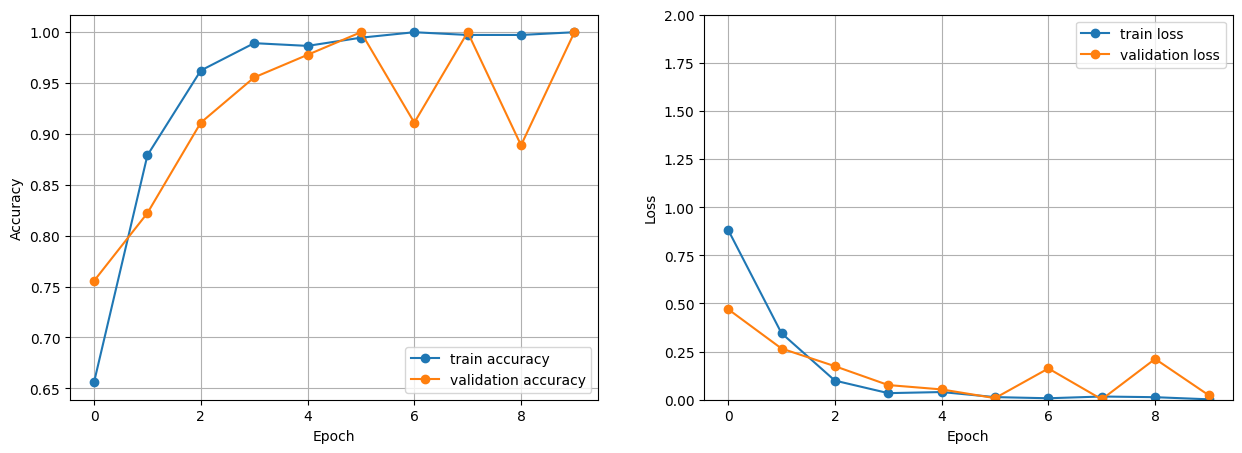

In [12]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your local dataset directory
data_dir = 'dataset'  # Update this path

train_data_dir = os.path.join(data_dir, 'train')
test_data_dir = os.path.join(data_dir, 'test')
validation_data_dir = os.path.join(data_dir, 'validation')

CATEGORIES = ['mask', 'not_mask', 'incorrect_mask']
IMG_SIZE = (227, 227)
BATCH_SIZE = 32

# Function to load and preprocess images with resizing
def load_and_preprocess_images(directory):
    images = []
    labels = []
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        label = CATEGORIES.index(category)
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path)
            img_resized = cv2.resize(img, IMG_SIZE)
            images.append(img_resized)
            labels.append(label)
    return images, labels

X_train, Y_train = load_and_preprocess_images(train_data_dir)
X_valid, Y_valid = load_and_preprocess_images(validation_data_dir)
X_test, Y_test = load_and_preprocess_images(test_data_dir)

# Convert lists to arrays
X_train = np.array(X_train) / 255.0
X_valid = np.array(X_valid) / 255.0
X_test = np.array(X_test) / 255.0
Y_train = np.array(Y_train)
Y_valid = np.array(Y_valid)
Y_test = np.array(Y_test)

# Load the pre-trained VGG16 model without top layers
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)

# Build your custom model on top of the VGG16 base
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(CATEGORIES), activation='softmax')
])

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.00001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
h = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=BATCH_SIZE,
    validation_data=(X_valid, Y_valid)
)

# Plot training history
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


In [13]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy:.4f}")


2/2 [==============================] - 11s 3s/step - loss: 0.1891 - accuracy: 0.9556
Test accuracy: 0.9556
